# RGB Frames

Separating an image into its RGB frames means `breaking down the image into its three primary color channels: Red, Green, and Blue`. Each of these channels contains the intensity values for that particular color, and `when combined, they create the full-color image.`

**Understanding Image Representation:**

+ A color image is usually stored as a 3D array (or matrix) of size `(height, width, 3).`
+ Each pixel in this array has three values, representing the intensities of Red, Green, and Blue.


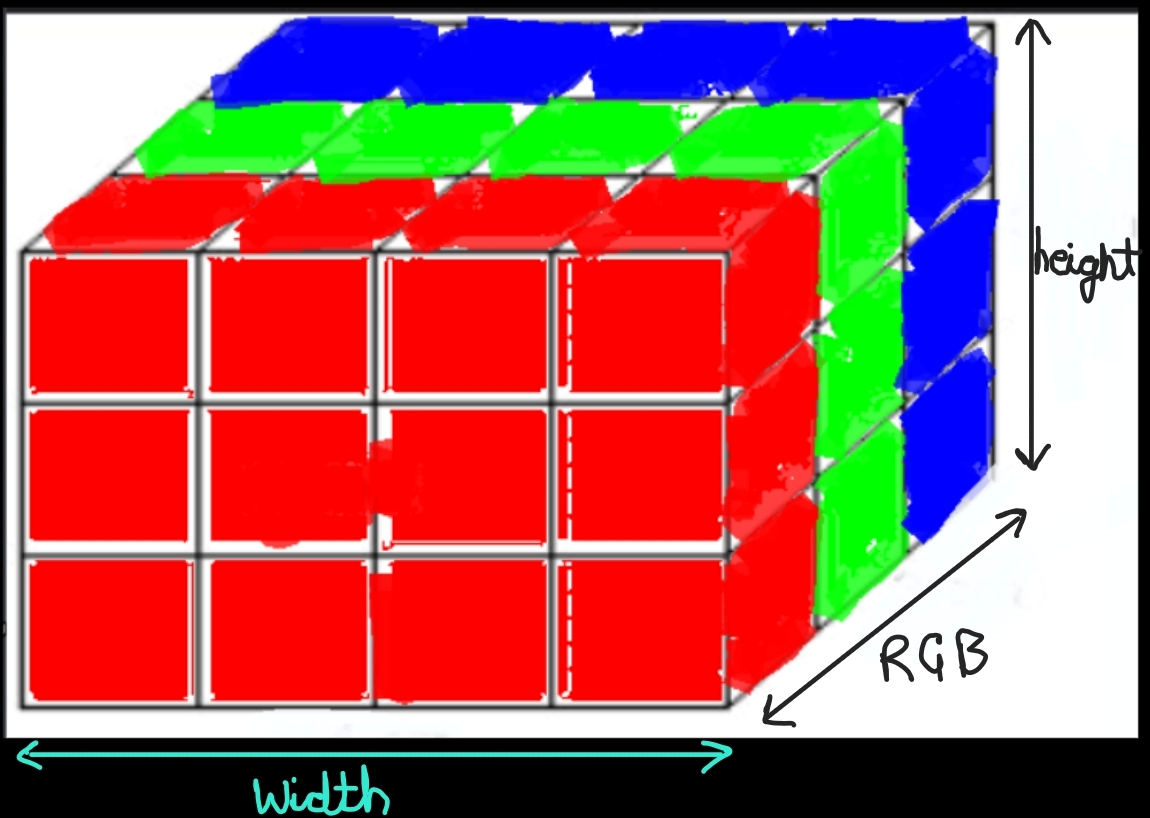

There are 3 channels that we obtain when we seperate the image into their RBG frames.
1. **<u>Red Channel:**</u> `Contains the intensity of red light in each pixel. A grayscale image where higher values represent more red intensity.`
2. **<u>Green Channel:**</u> Contains the intensity of green light in each pixel. A grayscale image where higher values represent more green intensity.
3. **<u>Blue Channel:**</u> Contains the intensity of blue light in each pixel. A grayscale image where higher values represent more blue intensity.

Extracting a channel from an image involves isolating one of the three primary color components (Red, Green, or Blue) from the image.

![Screenshot 2024-07-02 131846.png](<attachment:Screenshot 2024-07-02 131846.png>)
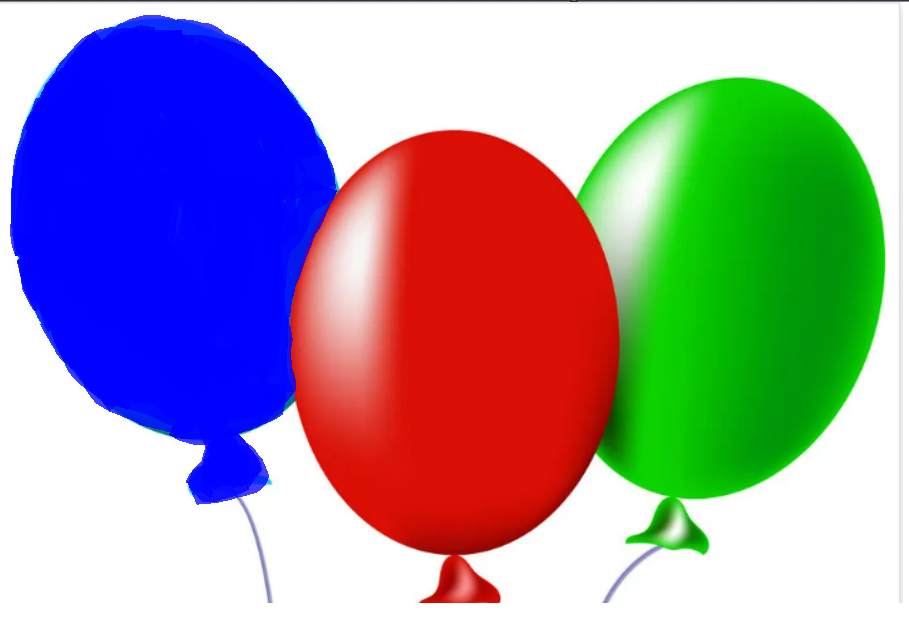

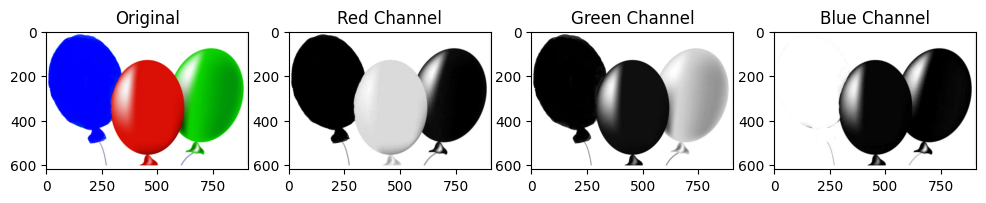

In [97]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('RGB2.png')

# Convert the image from BGR to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Separate the channels
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

plt.figure(figsize=(12, 9))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')

plt.show()


## Possible Applications in ADAS

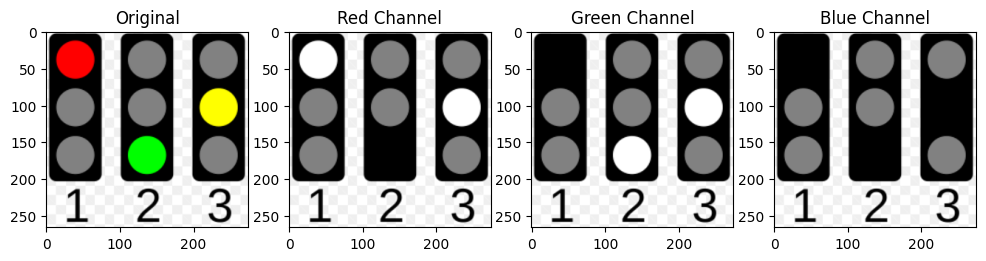

In [25]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('traffic_light.png')

# Convert the image from BGR to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Separate the channels
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

plt.figure(figsize=(12, 9))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')

plt.show()


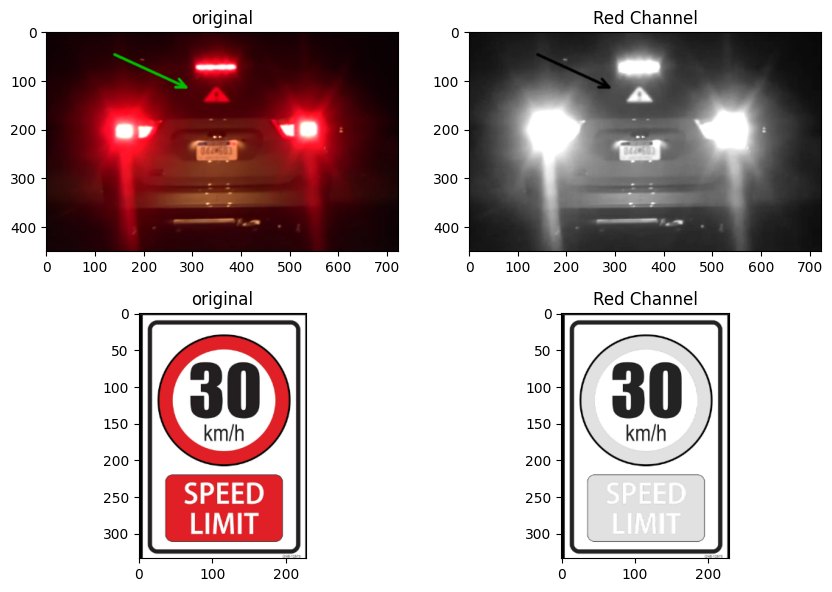

In [59]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('tail_lights2.png')
image2 = cv2.imread('SpeedLimit.png')

# Convert the image from BGR to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb2=(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

# Separate the channels
red_channel = image_rgb[:, :, 0]
red_channel2 = image_rgb2[:, :, 0]

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('original')

plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')

plt.subplot(2, 2, 3)
plt.imshow(image_rgb2)
plt.title('original')

plt.subplot(2, 2, 4)
plt.imshow(red_channel2, cmap='gray')
plt.title('Red Channel')

plt.show()


# Shape Detection

+ Shape detection is like `identifying objects based on their shapes.`
+ For example, if you see a round shape in an image, you might recognize it as a ball or a circle. In images, shape detection helps us find specific shapes, like circles, squares, or triangles.

## Steps in Shape Detection

1. **<u>Preprocessing:</u>**
    + Convert the image to grayscale if color is not crucial for shape detection.
    + Apply filters to reduce noise and enhance edges.

2. **<u>Edge Detection:</u>**
    + Use edge detection algorithms like Canny edge detection to find the boundaries of shapes.
    + This returns a new image with highlighted edges.

3. **<u>Contour Detection:</u>**
    + Use contour detection algorithms to find and extract the contours of shapes.
    + This returns a set of points that we can use to make closed curves that depict the boundaries on our original image.

Text(0.5, 1.0, 'Shape Detection')

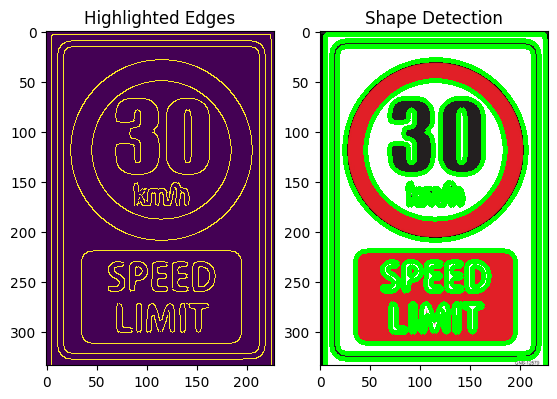

In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('speed_limit.png')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2) # kernel size around pixel to apply blur,std around X,Y axis

# Detect edges using Canny
edges = cv2.Canny(blurred_image, 50, 150) # lower threshold,higher threshold of gradient detection

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3) # All contours,color of contour,thickness of contour

plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.imshow(edges)
plt.title('Highlighted Edges')

plt.subplot(1,3,2)
plt.imshow(contour_image)
plt.title('Shape Detection')


# Color Detection

+ Color detection is `like looking for specific colors in an image.`
+ Imagine you're looking for red apples in a basket of fruits. You can easily spot the red apples because their color stands out. 
+ Similarly, in an image, we can use color detection to find areas that have a specific color, like red.

## Why do we need color detection if we can seperate an image into RGB Frames?

1. **<u>Target Specific Colors:</u>** Color detection can `precisely identify specific colors, even those that are combinations of RGB values`, like orange or purple, which might be hard to isolate using just RGB frames.
2. **<u>Contextual Information:</u>** Color detection helps in `identifying objects by their actual color context` (e.g., red for stop signs), which is `more intuitive and effective than analyzing separate RGB channels.`
3. **<u>Noise Reduction:**</u> Using color spaces like HSV or HSL for color detection can `reduce the impact of lighting variations and shadows`, providing more reliable results.This is because when we use `color spaces like HSV (Hue, Saturation, Value), we separate color information (Hue) from brightness (Value)`.This makes it easier to detect colors consistently, even if the lighting changes, `reducing the "noise" from shadows or bright spots.`
4. **<u>Simpler Logic:</u>** Color detection using HSV can `simplify the logic` for detecting ranges of colors, making it easier to identify objects based on their color properties.In RGB, we need to check multiple conditions to identify a color (e.g., to find red, we need high Red and low Green and Blue).<br>
Example:<br>

+ RGB: To find red, check:<br>
    + Red channel is high
    + Green channel is low
    + Blue channel is low

+ HSV: To find red, check:
    + Hue is between 0-10 or 170-180

## Steps in Color Based Detection

1. **<u>Convert to a Suitable Color Space:</u>**
    + Sometimes, color detection is easier in color spaces like `HSV` (Hue, Saturation, Value) rather than RGB.

2. **<u>Thresholding:</u>**
    + `Define the range` of color values to detect the desired color.

3. **<u>Masking:</u>**
    + `Create a binary mask` where the detected color is highlighted.
    + The mask is a binary image where `white pixels (255) represent the areas matching the color criteria and black pixels (0) represent the rest.`
    + We `combine the original image and the mask in such a way that only the pixels corresponding to the white areas of the mask are retained in the output. Pixels corresponding to the black areas of the mask are set to black in the output image.`
4. **<u>Post-processing:</u>**
    + Apply morphological operations to refine the mask.(Cleaning and Manipulating shapes in detected regions)
    + Find and draw contours to highlight the detected regions.(We can filter out detections that are too small,too large or have an irregular shape)

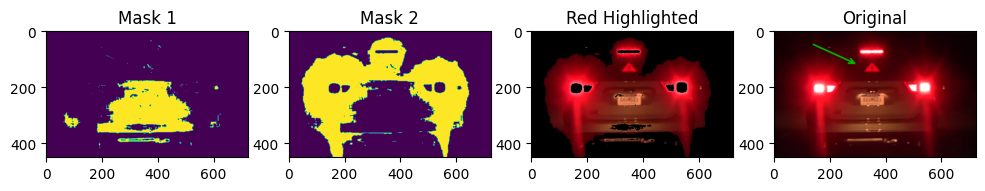

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tail_lights2.png')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for red color in HSV
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# Creating masks for red color
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

# Combine the masks
red_mask = mask1 + mask2

# Apply the mask to the original image
red_highlighted = cv2.bitwise_and(image_rgb, image_rgb, mask=red_mask)

plt.figure(figsize=(12,9))
plt.subplot(1,4,1)
plt.imshow(mask1)
plt.title('Mask 1')

plt.subplot(1,4,2)
plt.imshow(mask2)
plt.title('Mask 2')


plt.subplot(1,4,3)
plt.imshow(red_highlighted)
plt.title('Red Highlighted')

plt.subplot(1,4,4)
plt.imshow(image_rgb)
plt.title('Original')

plt.show()


# Combining the two

+ The shape recognition system is to be intermingled with color recognition to produce an efficient technique for object recognition.

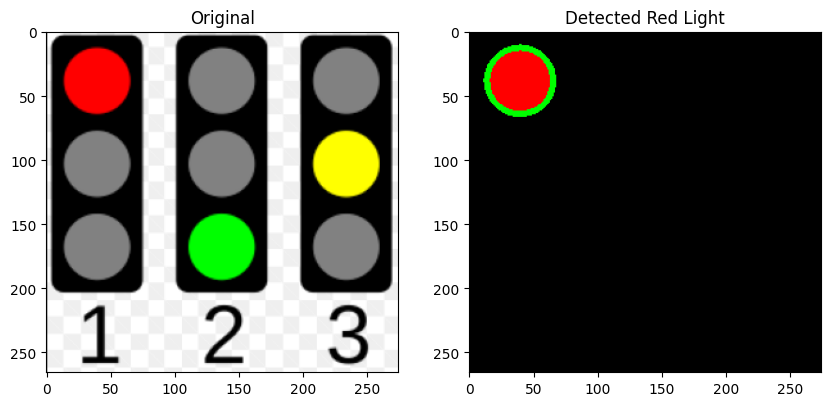

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('traffic_light.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for red color in HSV
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# Create masks for red color
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

# Combine the masks
red_mask = mask1 + mask2

red_highlighted = cv2.bitwise_and(image_rgb, image_rgb, mask=red_mask)

# Detect edges using Canny
edges = cv2.Canny(red_highlighted, 50, 150) # lower threshold,higher threshold of gradient detection

# Find contours
contours, hierarchy= cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = red_highlighted.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3) # All contours,color of contour,thickness of contour


# Display the result
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(contour_image)
plt.title('Detected Red Light')
plt.show()
